In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/dataset/retail_sales_dataset.csv')
df.head()



,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/dataset/retail_sales_dataset.csv')

info = df.info()
describe = df.describe(include='all')
missing = df.isnull().sum()

info, describe, missing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


(None,
         Transaction ID        Date Customer ID  Gender         Age  \
 count      1000.000000        1000        1000    1000  1000.00000   
 unique             NaN         345        1000       2         NaN   
 top                NaN  2023-05-16    CUST1000  Female         NaN   
 freq               NaN          11           1     510         NaN   
 mean        500.500000         NaN         NaN     NaN    41.39200   
 std         288.819436         NaN         NaN     NaN    13.68143   
 min           1.000000         NaN         NaN     NaN    18.00000   
 25%         250.750000         NaN         NaN     NaN    29.00000   
 50%         500.500000         NaN         NaN     NaN    42.00000   
 75%         750.250000         NaN         NaN     NaN    53.00000   
 max        1000.000000         NaN         NaN     NaN    64.00000   
 
        Product Category     Quantity  Price per Unit  Total Amount  
 count              1000  1000.000000     1000.000000   1000.000000  

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/dataset/retail_sales_dataset.csv')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Check duplicates
duplicates_count = df.duplicated().sum()

# Remove duplicates if any
df_cleaned = df.drop_duplicates()

duplicates_count, df_cleaned.head()


(np.int64(0),
    Transaction ID       Date Customer ID  Gender  Age Product Category  \
 0               1 2023-11-24     CUST001    Male   34           Beauty   
 1               2 2023-02-27     CUST002  Female   26         Clothing   
 2               3 2023-01-13     CUST003    Male   50      Electronics   
 3               4 2023-05-21     CUST004    Male   37         Clothing   
 4               5 2023-05-06     CUST005    Male   30           Beauty   
 
    Quantity  Price per Unit  Total Amount  Year  Month  Day  
 0         3              50           150  2023     11   24  
 1         2             500          1000  2023      2   27  
 2         1              30            30  2023      1   13  
 3         1             500           500  2023      5   21  
 4         2              50           100  2023      5    6  )

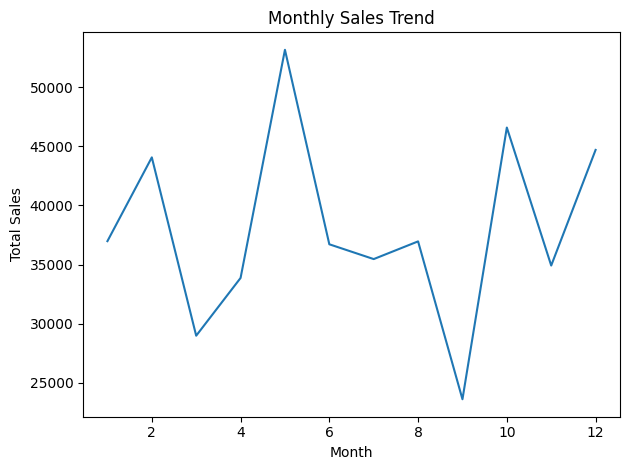

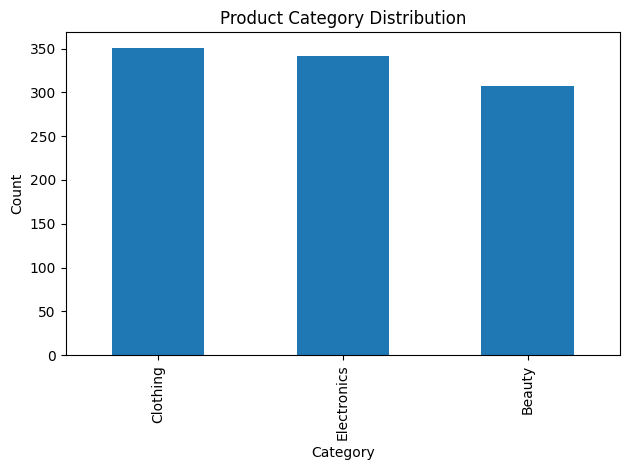

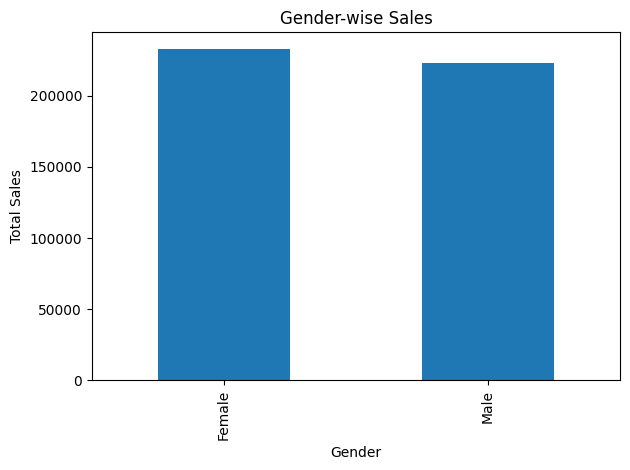

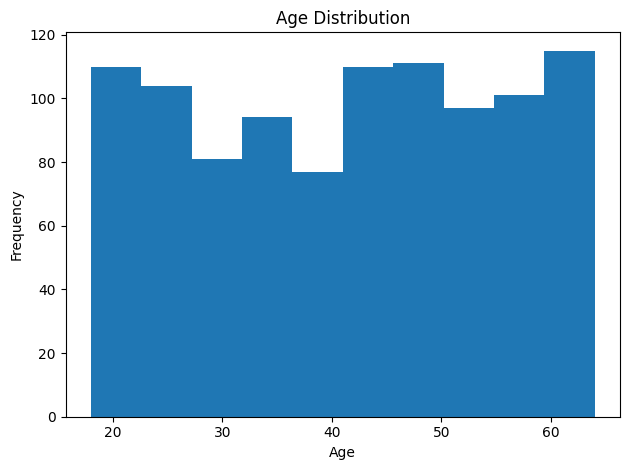

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/dataset/retail_sales_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# 1. Monthly Sales Trend
plt.figure()
monthly_sales = df.groupby('Month')['Total Amount'].sum()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# 2. Product Category Count
plt.figure()
category_counts = df['Product Category'].value_counts()
category_counts.plot(kind='bar')
plt.title("Product Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3. Gender-wise Total Sales
plt.figure()
gender_sales = df.groupby('Gender')['Total Amount'].sum()
gender_sales.plot(kind='bar')
plt.title("Gender-wise Sales")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# 4. Age Distribution
plt.figure()
df['Age'].plot(kind='hist', bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
